# Week3授業課題 信用情報の分析

## 【問題1】コンペティション内容の把握

## Home Creditはどのような企業？

9か国で事業を展開する国際的な消費者金融プロバイダーです。主に信用履歴がほとんどまたはまったくない人々への融資が主要となります。

## このコンペティションでは何を予測する？

ユーザーのローン返済能力の予測

### それを予測することで企業が得られるメリットは何？

- 売上拡大
- 貸倒の減少
- 業務の効率化

## 【問題2】データの概観の把握

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# pd.set_option('display.max_columns', 130)
# pd.set_option('display.max_rows', 130)
df = pd.read_csv("dataset/application_train.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
### クラスごとのデータ数をグラフに出す

In [8]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

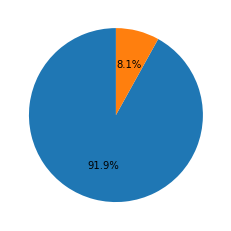

In [9]:
count = df["TARGET"].value_counts()
plt.pie(count, startangle=90, autopct="%1.1f%%")
plt.show()

HomeCredit_columns_description.csv から「1」が返済に問題のあったローン、「2」がそれ以外（問題のない）ローンとだということを確認。

## 【問題3】課題設定

- 欠損値が多いデータはどのようなデータなのか
- 欠損値の高いデータは削除してもよいか
- 数値ではないデータの扱いをどうするか
- 性別と返済との関連性
- 車の所有と返済との関連性
- 家の所有と返済との関連性
- 学歴と返済との関連性
- 収入の種類と返済との関連性
- 家族の状況と返済との関連性
- 全体的な特徴量の相関を検証

## 【問題4】データ探索

### 欠損値が多いデータはどのようなデータなのか

In [10]:
# 欠損値の割合を上位20個を表示
def missing_data(data):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df).head(20)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


すべての特徴量の名称に「_MODE」と「_AVG」、「_MEDI」が付属している。
HomeCredit_columns_description.csvによると、正規化されたデータで「_MODE（modus）」は最頻値、「_AVG（average）」は平均、「_MEDI（median）」は中央値という定義がされている。

### 欠損値の高いデータは削除してもよいか

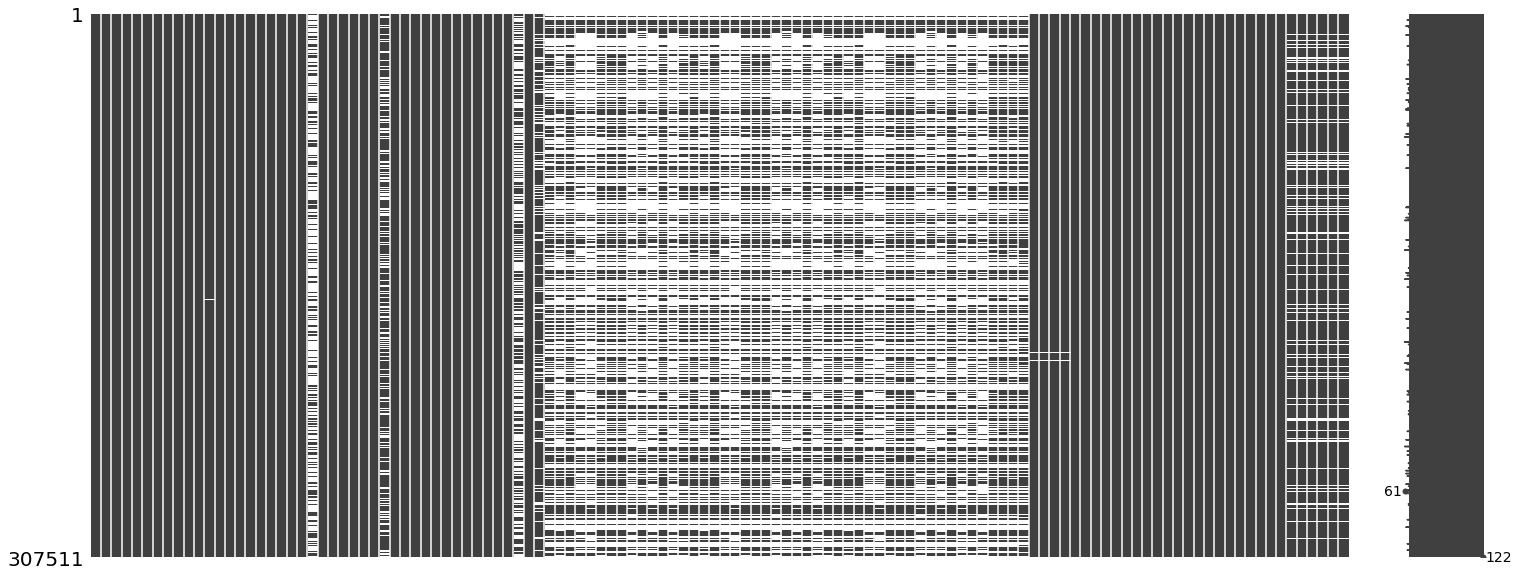

In [11]:
import missingno as msno
msno.matrix(df)

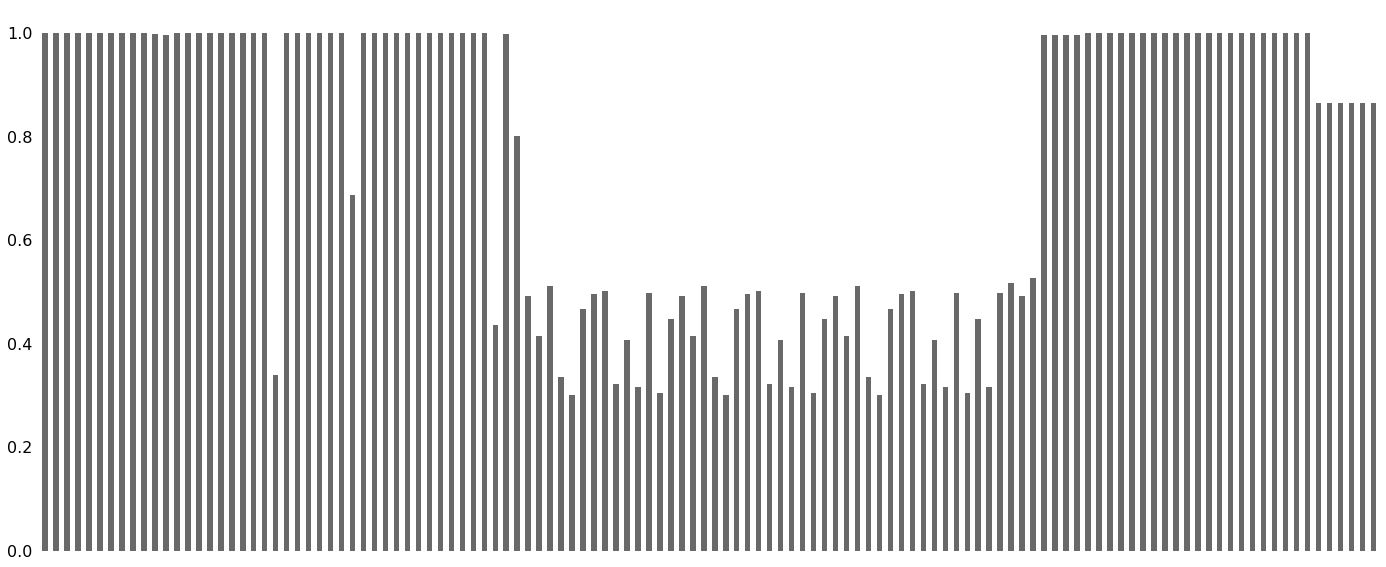

In [12]:
msno.bar(df)

欠損値全体を可視化した印象では欠損値が全体に占める割合が高く、正規化済みのデータのため除外しても良さそうだが、とりあえずは保留とする（欠損値を0で置換して検証）。

### 数値ではないデータの扱いをどうするか

In [13]:
# objectの中身を確認
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

カテゴリ変数の数は「ORGANIZATION_TYPE」の除いて、比較的少数で構成。  
機械学習モデルはカテゴリ変数をそのまま扱うことができないため、数値としてエンコード（表現）する必要がある。
エンコードの手法は2つあり、カテゴリの数が2つの場合は「Label encoding」、3つ以上の場合は「One-hot encoding」を利用することが一般的。

### 性別と返済の関連性

In [ ]:
def pie_plot(feature):
    
    #円グラフの描画
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    ax1.pie(df[df['TARGET']==0][feature].value_counts(), startangle=90, 
            autopct="%1.1f%%", labels=list(df[df['TARGET']==0][feature].value_counts().index))
    ax2.pie(df[df['TARGET']==1][feature].value_counts(), startangle=90, 
            autopct="%1.1f%%", labels=list(df[df['TARGET']==1][feature].value_counts().index))
    
    #タイトル
    ax1.set_title(feature + '(TARGET = 0)')
    ax2.set_title(feature + '(TARGET = 1)')

    plt.show()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


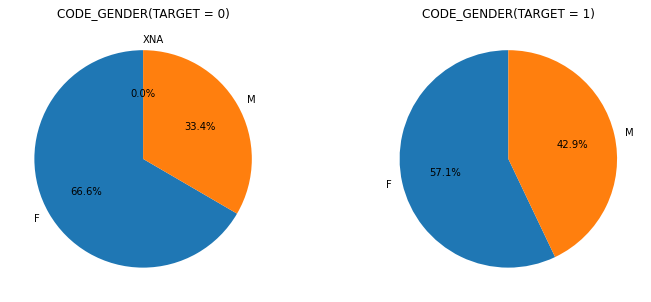

In [15]:
# クライアントの性別（CODE_GENDER）
feature = 'CODE_GENDER'
print(df[feature].value_counts())
pie_plot(feature)

性別（CODE_GENDER）の件数はF（女性）がM（男性）よりも2倍近く多いが、ターゲット変数の割合ではM（男性）の方がF（女性）よりも返済できない（TARGET = 1）の可能性がやや高い。

### 車の所有と返済の関連性

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


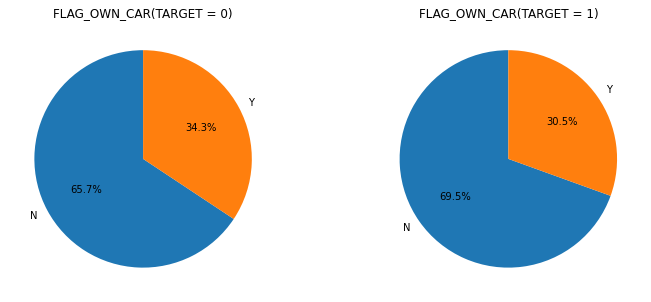

In [16]:
# 車の所有（FLAG_OWN_CAR）
feature = 'FLAG_OWN_CAR'
print(df[feature].value_counts())
pie_plot(feature)

車の所有者（Y）よりも非所有者（N）の方が2倍ほど件数が多いが、ターゲット変数の割合から非所有者（N）の方が返済できない（TARGET = 1）傾向が若干みられる。

### 家の所有と返済の関連性

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


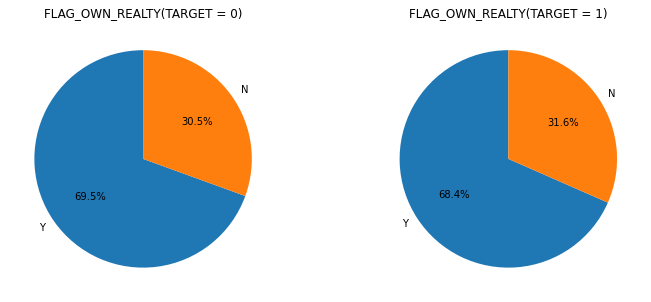

In [17]:
# 家の所有（FLAG_OWN_REALTY）
feature = 'FLAG_OWN_REALTY'
print(df[feature].value_counts())
pie_plot(feature)

全体の約3割が家を所有している。  
ターゲット変数の割合では大きな差が発生していないことから、返済とは関係がないと思われる。

### 学歴と返済の関連性

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


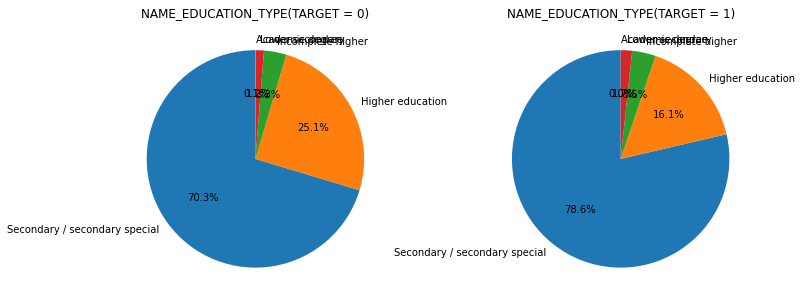

In [18]:
# 学歴（NAME_EDUCATION_TYPE）
feature = 'NAME_EDUCATION_TYPE'
print(df[feature].value_counts())
pie_plot(feature)

大学等（Higher education）と高等学校等（Secondary / secondary special ）のターゲット変数がTARGET=0と1では割合が変動しているため、返済に関連する可能性が高い。

### 収入の種類と返済の関連性

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


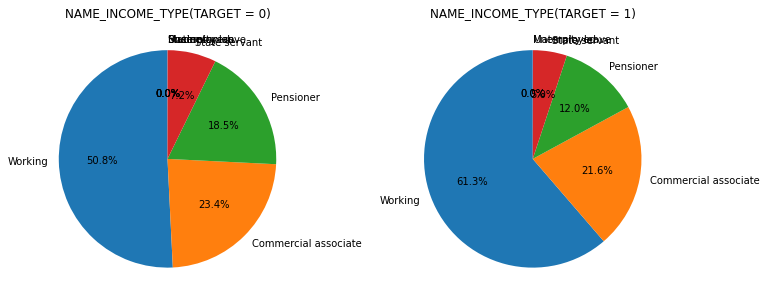

In [19]:
# 収入の種類（NAME_INCOME_TYPE）
feature = 'NAME_INCOME_TYPE'
print(df[feature].value_counts())
pie_plot(feature)

労働収入（Working）と年金受給者（Pensioner）のターゲット変数がTARGET=0と1では割合が変動しているため、返済に関連する可能性が高い。

### 家族の状況と返済の関連性

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


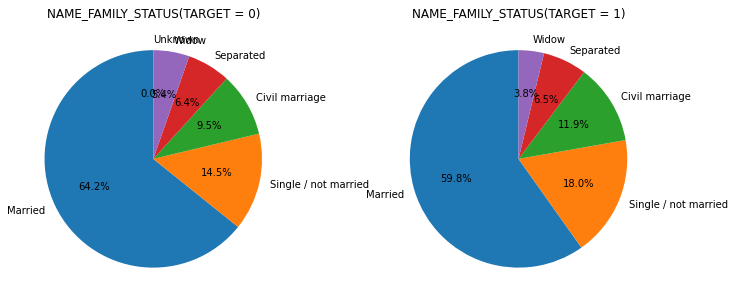

In [20]:
# 家族の状況（NAME_FAMILY_STATUS）
feature = 'NAME_FAMILY_STATUS'
print(df[feature].value_counts())
pie_plot(feature)

既婚（Married）と未婚（Single / not married）のターゲット変数がTARGET=0と1では割合が変動しているため、返済に関連する可能性が高い。

### 全体的な特徴量の相関を検証

In [21]:
# int/floatとobjectを分離
df_tmp = df
list_str=[] 

for i in df.columns:
    if df[i].dtypes == 'O':
        df_tmp = df_tmp.drop([i], axis = 1)
        list_str.append(i)

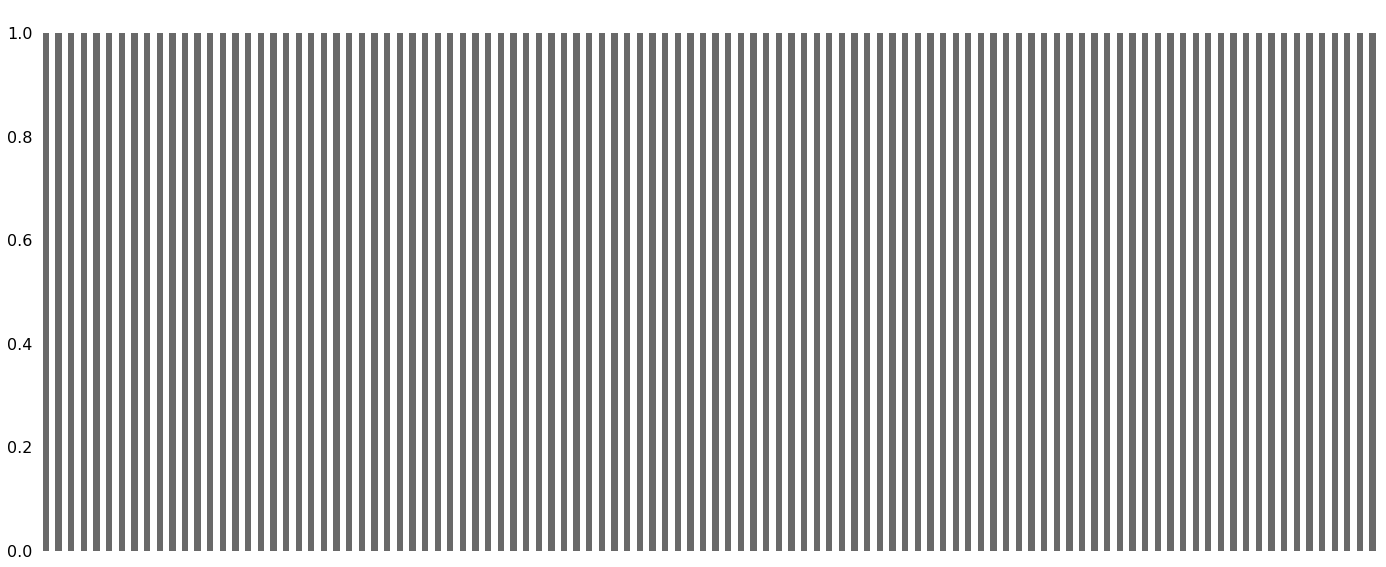

In [22]:
# int/floatの欠損値を0で置換して確認

df_tmp = df_tmp.replace(np.nan,0)
msno.bar(df_tmp) #3

In [23]:
# objectをダミー変数に変換
df_str = df[list_str]
df_str_dummy = pd.get_dummies(df_str)
df_str_dummy.describe()

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.904787,0.095213,0.658344,0.341643,0.000013,0.659892,0.340108,0.306327,0.693673,0.010624,...,0.003941,0.030090,0.007466,0.005785,0.005284,0.214757,0.210773,0.017437,0.518446,0.007570
std,0.293509,0.293509,0.474266,0.474261,0.003607,0.473746,0.473746,0.460968,0.460968,0.102524,...,0.062656,0.170835,0.086085,0.075840,0.072501,0.410654,0.407858,0.130892,0.499660,0.086679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
#object(ダミー変数に変換)と、int/float(欠損値を０で置換)を結合
df_mix = pd.concat([df_tmp, df_str_dummy], axis=1)
display(df_mix.describe())
display(df_mix.info())

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27107.516051,5.379095e+05,0.020868,-16036.995067,63815.045904,...,0.003941,0.030090,0.007466,0.005785,0.005284,0.214757,0.210773,0.017437,0.518446,0.007570
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14494.443757,3.696338e+05,0.013831,4363.988632,141275.766519,...,0.062656,0.170835,0.086085,0.075840,0.072501,0.410654,0.407858,0.130892,0.499660,0.086679
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,0.000000,0.000000e+00,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 246 entries, SK_ID_CURR to EMERGENCYSTATE_MODE_Yes
dtypes: float64(65), int64(41), uint8(140)
memory usage: 289.7 MB


None

In [25]:
#　TARGETとの相関係数の絶対値が0.1以上のデータを抽出
from scipy.stats import pearsonr

list_i = []
for i in df_mix.columns: #8
    a, b = pearsonr(df_mix[i], df_mix["TARGET"])
    if 0.05 < abs(a) :
        list_i.append(i)
        print("{}, {:.2f}".format(i, a))

TARGET, 1.00
DAYS_BIRTH, 0.08
DAYS_ID_PUBLISH, 0.05
REGION_RATING_CLIENT, 0.06
REGION_RATING_CLIENT_W_CITY, 0.06
REG_CITY_NOT_WORK_CITY, 0.05
EXT_SOURCE_1, -0.06
EXT_SOURCE_2, -0.16
EXT_SOURCE_3, -0.12
DAYS_LAST_PHONE_CHANGE, 0.06
CODE_GENDER_F, -0.05
CODE_GENDER_M, 0.05
NAME_INCOME_TYPE_Working, 0.06
NAME_EDUCATION_TYPE_Higher education, -0.06


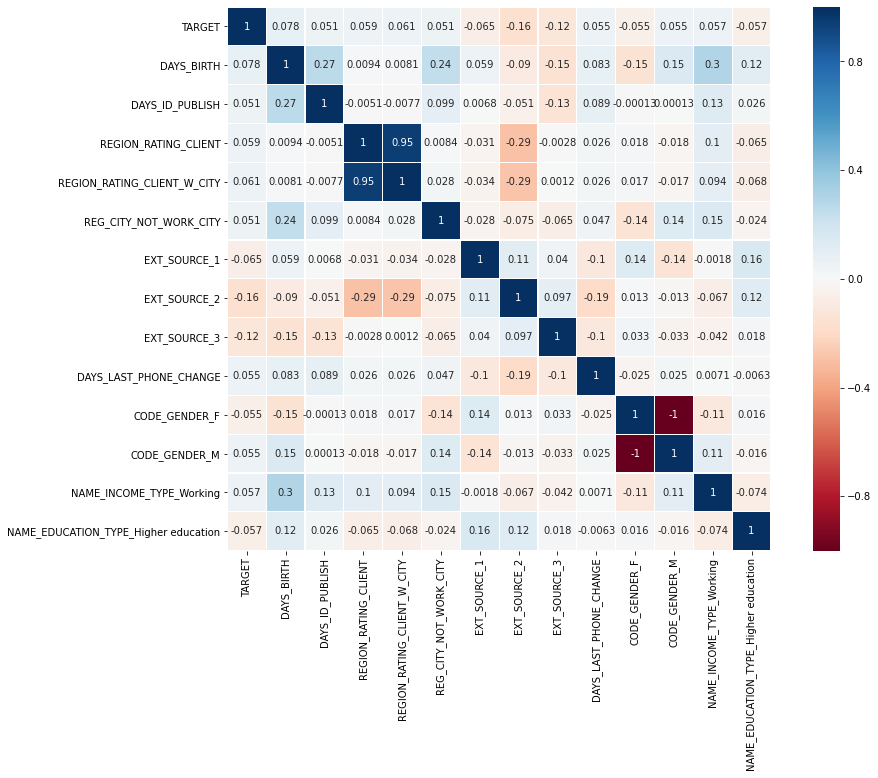

In [27]:
#相関係数行列を作成
plt.figure(figsize=(15, 10))
colormap = plt.cm.RdBu
sns.heatmap(df_mix[list_i].corr(), linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)